# Marie McCrary

## This notebook loads Mackenzie River data and analyzes it using pandas

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import datetime
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

%matplotlib inline

# Mackenzie River Temperatures


Read in data from two datasets: ArcticGRO (the Water Quality dataset) and GEMS. <br />
ArcticGRO -> df_a <br />
ArcticGRO temperatures -> Temp <br />
GEMS -> df_g <br />

Some notes about this data:
1. The data were collected over several decades, and the data were not always consistently collected
2. The temperature data has large temporal gaps and few datapoints are in the ArcticGRO dataset

In [2]:
# d1 = pd.read_csv('~/Research/Rivers/River_temperature/GEMS_MackenzieRiver_Temperature.csv', header=0, parse_dates=[1], index_col=[1]) 
# df_g = pd.DataFrame(data=d1) 
# df_g = df_g.rename(columns = {'Value': 'Temp'})
# df_g = df_g[df_g['Temp'].notna()]
# df_g = df_g[df_g.Temp != 25]
# df_g = df_g[df_g.Temp != 18.7]
# This dataset is trash

In [3]:
d2 = pd.read_csv('~/Research/Rivers/River_temperature/ArcticGRO_Water_Quality_Data_Mackenzie.csv', header=8, parse_dates=[2], index_col=[2]) 
df_a = pd.DataFrame(data=d2) 
df_a=df_a.drop([df_a.index[0]])
df_a.index = pd.to_datetime(df_a.index)
df_a['Temp'] = df_a.Temp.astype(float, errors = 'raise')
df_a = df_a[df_a['Temp'].notna()]


In [4]:
d3 = pd.read_csv('~/Research/Rivers/River_temperature/Env_Canada_WQ.csv', header=0, parse_dates=[1], index_col=[1]) 
df_e = pd.DataFrame(data = d3)
df_e = df_e.loc[df_e.VARIABLE == 'TEMPERATURE WATER']
df_e = df_e.loc[df_e.SITE_NO == 'NW10LA0003']
df_e['VALUE_VALEUR'] = df_e.VALUE_VALEUR.astype(float, errors = 'raise')
df_e = df_e.rename(columns = {'VALUE_VALEUR': 'Temp'})
df_e = df_e[df_e['Temp'].notna()]


Combine two datasets to clean up code. All temperature data are in temperature dataframe.

In [5]:
series1 = pd.Series(df_a.Temp)
series2 = pd.Series(df_e.Temp)
temperature = series1.append(series2)

temperature.count()

160

In [6]:
temp_grouped = temperature.groupby(temperature.index.month)
df_a_grouped = df_a.Temp.groupby(df_a.index.month)
df_e_grouped = df_e.Temp.groupby(df_e.index.month)

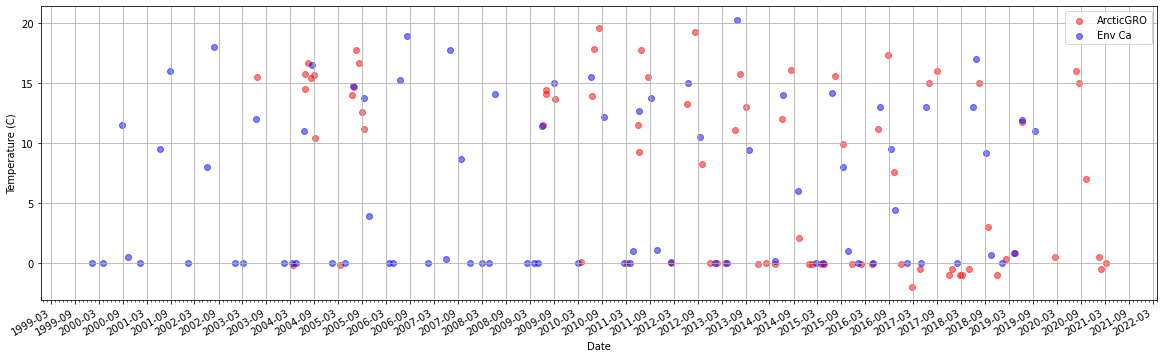

In [12]:
fig, ax = plt.subplots(figsize=(20,6))

ax.scatter(df_a.index.values, df_a.Temp, color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.values, df_e.Temp, color = 'Blue', label = 'Env Ca', alpha = 0.5)


ax.set(xlabel="Date",
       ylabel="Temperature (C)")

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

ax.legend()
plt.grid()
plt.show()


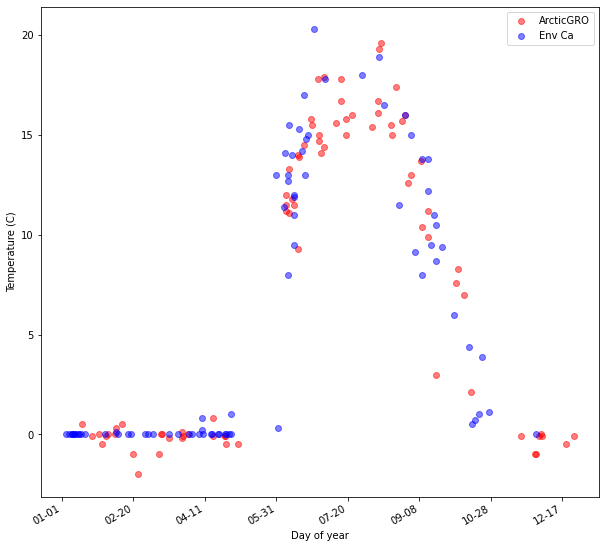

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df_a.index.day_of_year, df_a['Temp'], color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.day_of_year, df_e['Temp'], color = 'Blue', label = 'Env Ca', alpha = 0.5)


ax.set(xlabel="Day of year",
       ylabel="Temperature (C)")
ax.legend()


# # Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # Rotates and right aligns the x labels, and moves the bottom of the
# # axes up to make room for them.
fig.autofmt_xdate()

# ax.legend()
plt.show()
#April 1 to Nov 1, fit a curve through both


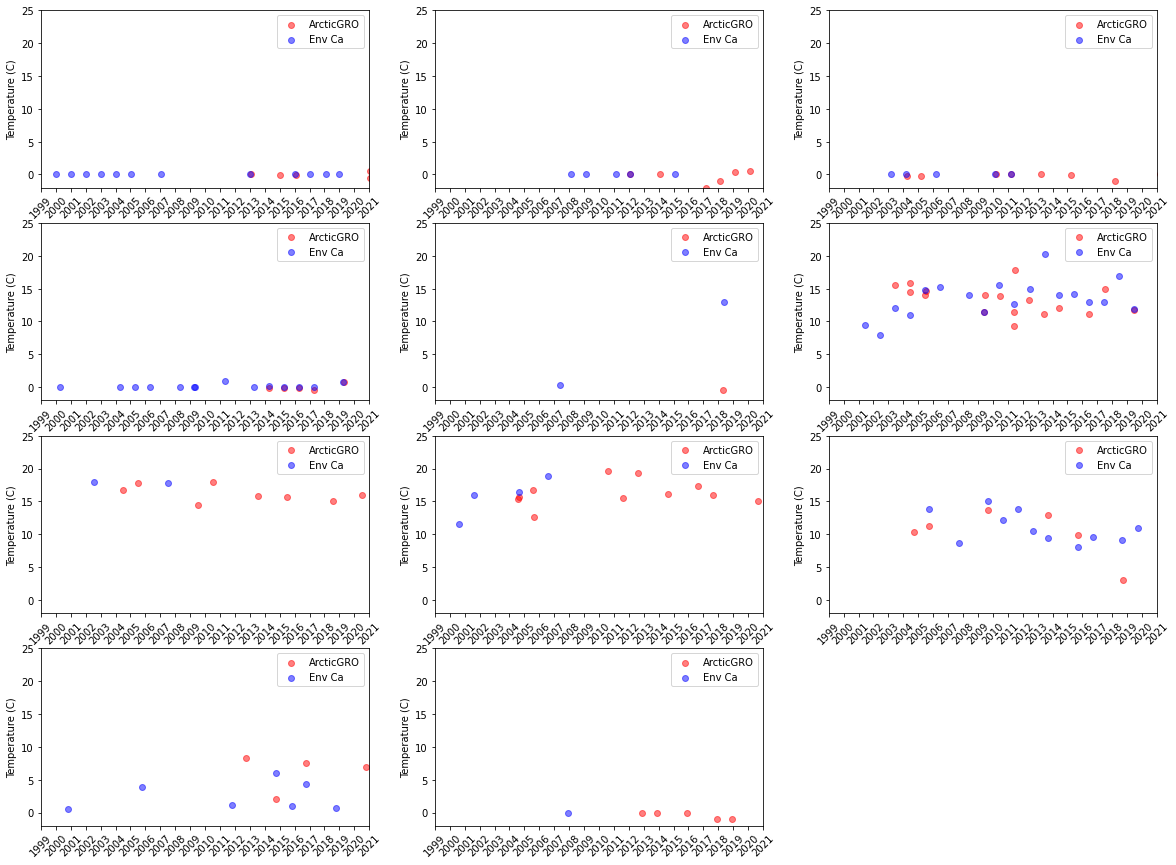

In [14]:

fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

left = datetime.date(1999, 1, 1)
right = datetime.date(2021, 1, 1)


for i in range(1,12):
    axs = fig.add_subplot(4,3,i)
    axs.set_ylim([-2,25])
    axs.set_xlim([left, right])
    plt.scatter(df_a_grouped.get_group(i).index, df_a_grouped.get_group(i), color = 'Red', label = 'ArcticGRO', alpha = 0.5)
    plt.scatter(df_e_grouped.get_group(i).index, df_e_grouped.get_group(i), color = 'Blue', label = 'Env Ca', alpha = 0.5)
    axs.legend()
   
    # Major ticks every year.
    fmt_year = mdates.MonthLocator(interval=12)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Temperature (C)")

axs.legend()
plt.show()
# Group by day of year
# Why is there such a range of temperatures in September of 2010?
# Plot August and September temperatures by day
# Plot 2010 from May through September by day

## Monthly trends in temperature

Temperature Trend = 0.001960784313725494
NRMSE: 0.17423419522763184
Temperature Trend = 0.07363636363636364
NRMSE: 0.2516169199004019
Temperature Trend = 0.010439560439560435
NRMSE: 0.24307256605998476
Temperature Trend = 0.022105263157894742
NRMSE: 0.22221360401878812
Temperature Trend = 6.75
NRMSE: 0.2077671776819732
Temperature Trend = 0.018963585434173726
NRMSE: 0.1978287690804541
Temperature Trend = 0.06303030303030188
NRMSE: 0.3459670917617997
Temperature Trend = 0.02417857142857152
NRMSE: 0.26295389077022696
Temperature Trend = -0.08762254901960806
NRMSE: 0.22896184071979997
Temperature Trend = -0.45454545454545436
NRMSE: 0.31373853948653474
Temperature Trend = -0.10285714285714284
NRMSE: 0.4139626545536196
Temperature Trend = -0.2
NRMSE: 0.23570226039551587


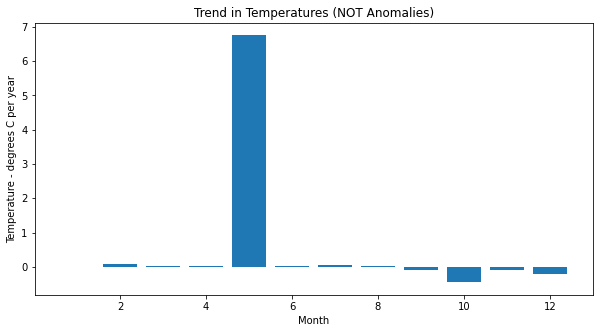

In [15]:
temp_trend = []
temp_nrmse = []
temp_trend_test = []
for i in range(1,13):
    #To perform the linear regression we need the dates to be numeric
    #date_ord = temp_grouped.get_group(i).index.values(datetime.date.toordinal)

    # perform regression
    coefficients, residuals, _, _, _ = np.polyfit(range(len(temp_grouped.get_group(i).index.values)),temp_grouped.get_group(i),1,full=True)
    mse = residuals[0]/(len(temp_grouped.get_group(i).index))
    nrmse = np.sqrt(mse)/(temp_grouped.get_group(i).max() - temp_grouped.get_group(i).min()) # or mean?
    temp_trend.append(coefficients[0])
    temp_nrmse.append(nrmse)
    print('Temperature Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    temp_trend_test.append(coefficients[1])
    
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(range(1,13), temp_trend)


plt.xlabel("Month")
plt.ylabel("Temperature - degrees C per year")
plt.title("Trend in Temperatures (NOT Anomalies)")

plt.show()

The above plot looks ridiculous because we only have 3 data points for May.

### Mean temperature for each month:
monthly_mean_temperature is the mean for each month in the series (237 months). <br />
monthly_mean is the mean of all the monthly means for each month.

In [16]:
monthly_mean_temperature = temperature.resample('M').mean().dropna()
monthly_mean = monthly_mean_temperature.groupby(monthly_mean_temperature.index.month).agg('mean')
monthly_min_temperature = temperature.resample('M').min().dropna()
monthly_min = monthly_min_temperature.groupby(monthly_min_temperature.index.month).agg('min')
monthly_max_temperature = temperature.resample('M').max().dropna()
monthly_max = monthly_max_temperature.groupby(monthly_max_temperature.index.month).agg('max')

In [17]:
monthly_mean_temperature

2000-01-31     0.0
2000-04-30     0.0
2000-08-31    11.5
2000-10-31     0.5
2001-01-31     0.0
              ... 
2020-07-31    16.0
2020-08-31    15.0
2020-10-31     7.0
2021-01-31     0.0
2021-03-31     0.0
Name: Temp, Length: 119, dtype: float64

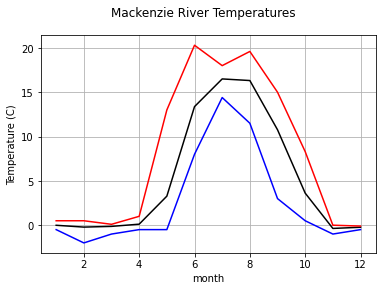

In [18]:
fig, ax = plt.subplots()
fig.suptitle('Mackenzie River Temperatures')

ax.plot(monthly_mean, label = 'Mean', color = 'black')
ax.plot(monthly_min, label = 'Min', color = 'blue')
ax.plot(monthly_max, label = 'Max', color = 'red')
#ax.fill_between(range(1,13), monthly_min_temperature, monthly_max_temperature, color = 'gray', alpha = 0.25)
ax.set(ylabel = "Temperature (C)", xlabel = 'month')
plt.grid()

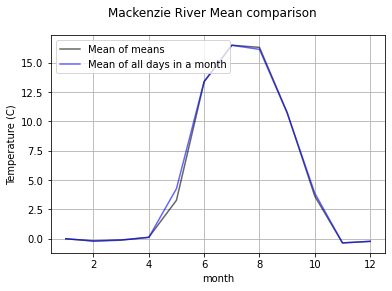

In [19]:
monthly_mean_old = temperature.groupby(temperature.index.month).agg('mean')

fig, ax = plt.subplots()
fig.suptitle('Mackenzie River Mean comparison')

ax.plot(monthly_mean, label = 'Mean of means', color = 'black', alpha = 0.6)
ax.plot(monthly_mean_old, label = 'Mean of all days in a month', color = 'blue', alpha = 0.6)
ax.set(ylabel = "Temperature (C)", xlabel = 'month')
ax.legend()
plt.grid()
# They are very close. Plot difference

## River Temperature Anomalies

In [20]:
anomaly = []

for i in range(1,13):
    diff = monthly_mean_temperature.groupby(monthly_mean_temperature.index.month).get_group(i) - monthly_mean[i]
    anomaly.append(diff)

In [21]:
anomaly[8]

2004-09-30   -0.364583
2005-09-30    1.735417
2007-09-30   -2.064583
2009-09-30    3.585417
2010-09-30    1.435417
2011-09-30    3.035417
2012-09-30   -0.264583
2013-09-30    0.435417
2015-09-30   -1.814583
2016-09-30   -1.264583
2018-09-30   -4.689583
2019-09-30    0.235417
Name: Temp, dtype: float64

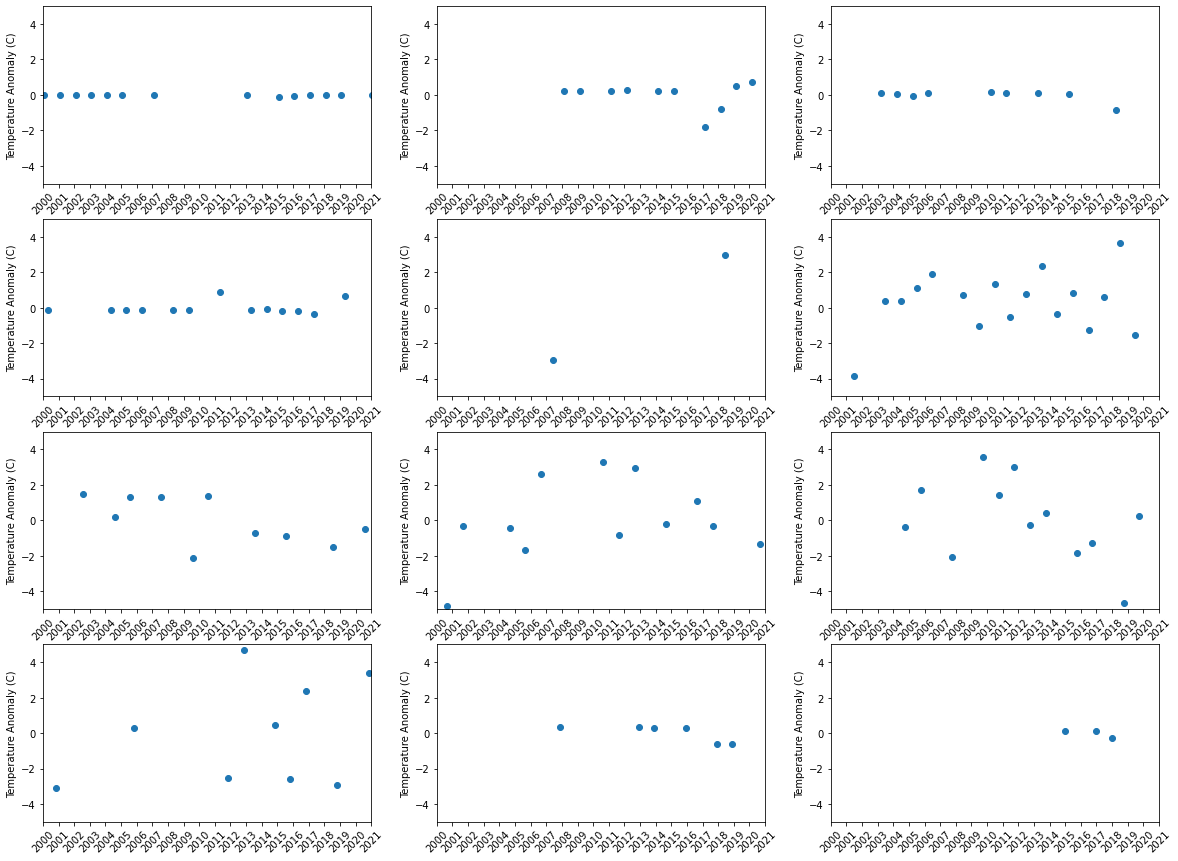

In [22]:

fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

left = datetime.date(2000, 1, 1)
right = datetime.date(2021, 1, 1)


for i in range(0,12):
    axs = fig.add_subplot(4,3,i+1)
    axs.set_ylim([-5, 5])
    axs.set_xlim([left, right])
    plt.scatter(anomaly[i].index, anomaly[i])
   
    # Major ticks every year.
    fmt_year = mdates.MonthLocator(interval=12)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Temperature Anomaly (C)")

plt.show()

Temperature Trend = -0.027575757575757566
Temperature Trend = -0.035454545454545454
Temperature Trend = 0.018131868131868123
Temperature Trend = 5.95
Temperature Trend = 0.15752493980048163
Temperature Trend = -0.26303030303030306
Temperature Trend = 0.18724941724941743
Temperature Trend = -0.2759615384615383
Temperature Trend = 0.315
Temperature Trend = -0.22857142857142854
Temperature Trend = -0.2


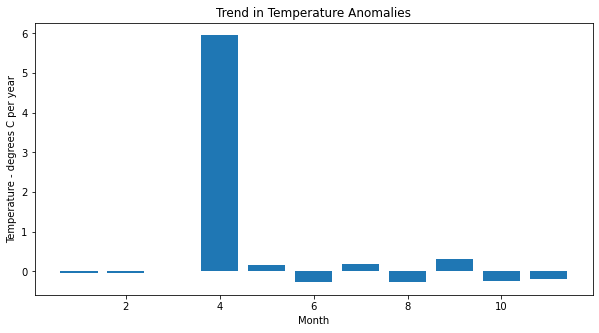

In [23]:
temp_trend_a = []
temp_nrmse_a = []
for i in range(1,12):
    #To perform the linear regression we need the dates to be numeric
    #date_ord = anomaly.index(datetime.date.toordinal)

    # perform regression
    coefficients, residuals, _, _, _ = np.polyfit(range(len(anomaly[i].index)),anomaly[i],1,full=True)
    #mse = residuals[0]/(len(anomaly[i].index))
    #nrmse = np.sqrt(mse)/(anomaly[i].max() - anomaly[i].min())
    temp_trend_a.append(coefficients[0])
    temp_nrmse_a.append(nrmse)
    print('Temperature Trend = ' + str(coefficients[0]))
    #print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(range(1,12), temp_trend_a)


plt.xlabel("Month")
plt.ylabel("Temperature - degrees C per year")
plt.title("Trend in Temperature Anomalies")

plt.show()

# Discharge

In [24]:
df_d = pd.read_csv('~/Research/Rivers/River_Discharge/ArcticGRO_discharge_data_Mackenzie.csv', parse_dates= [4], index_col = [4]) 
df_d = df_d[df_d['discharge'].notna()]
df_d

,river,agency,station_code,station_name,discharge,flag
date,,,,,,
1972-03-21,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,2290.0,A
1972-05-10,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,2970.0,A
1972-07-12,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,17600.0,A
1972-07-13,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,17100.0,A
1972-07-14,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,16600.0,A
...,...,...,...,...,...,...
2021-05-22,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,28208.0,P
2021-05-23,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,29445.0,P
2021-05-24,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,30216.0,P


In [25]:
discharge_grouped = df_d['discharge'].groupby(df_d.index.month)
discharge_grouped.agg("count")

date
1     1457
2     1328
3     1457
4     1449
5     1502
6     1440
7     1496
8     1505
9     1470
10    1519
11    1440
12    1478
Name: discharge, dtype: int64

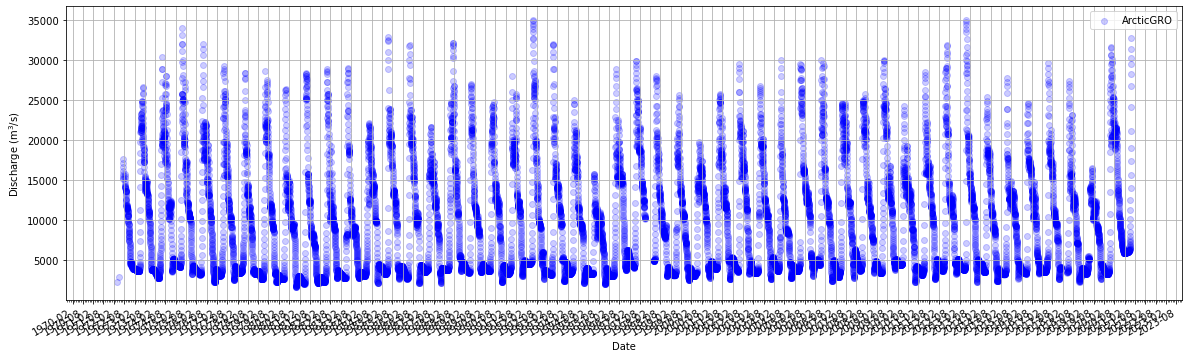

In [26]:
fig, ax = plt.subplots(figsize=(20,6))

ax.scatter(df_d.index.values, df_d.discharge, color = 'Blue', label = 'ArcticGRO', alpha = 0.2)


ax.set(xlabel="Date",
       ylabel="Discharge (m$^3$/s)")

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

ax.legend()
plt.grid()
plt.show()



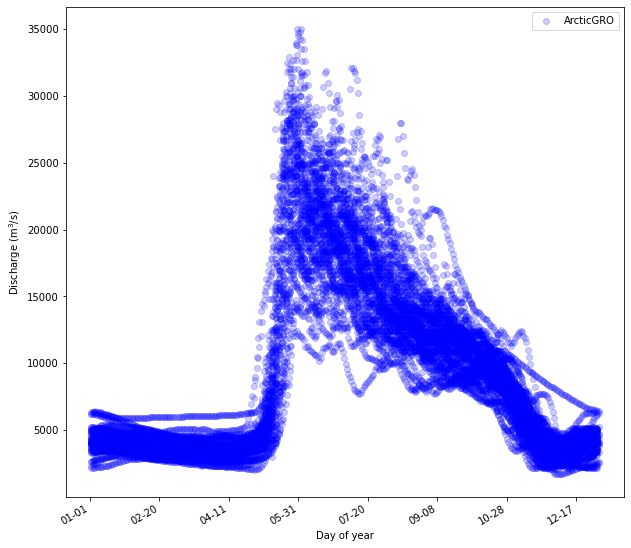

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df_d.index.day_of_year, df_d['discharge'], color = 'Blue', label = 'ArcticGRO', alpha = 0.2)


ax.set(xlabel="Day of year",
       ylabel="Discharge (m$^3$/s)")
ax.legend()


# # Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # Rotates and right aligns the x labels, and moves the bottom of the
# # axes up to make room for them.
fig.autofmt_xdate()

# ax.legend()
plt.show()

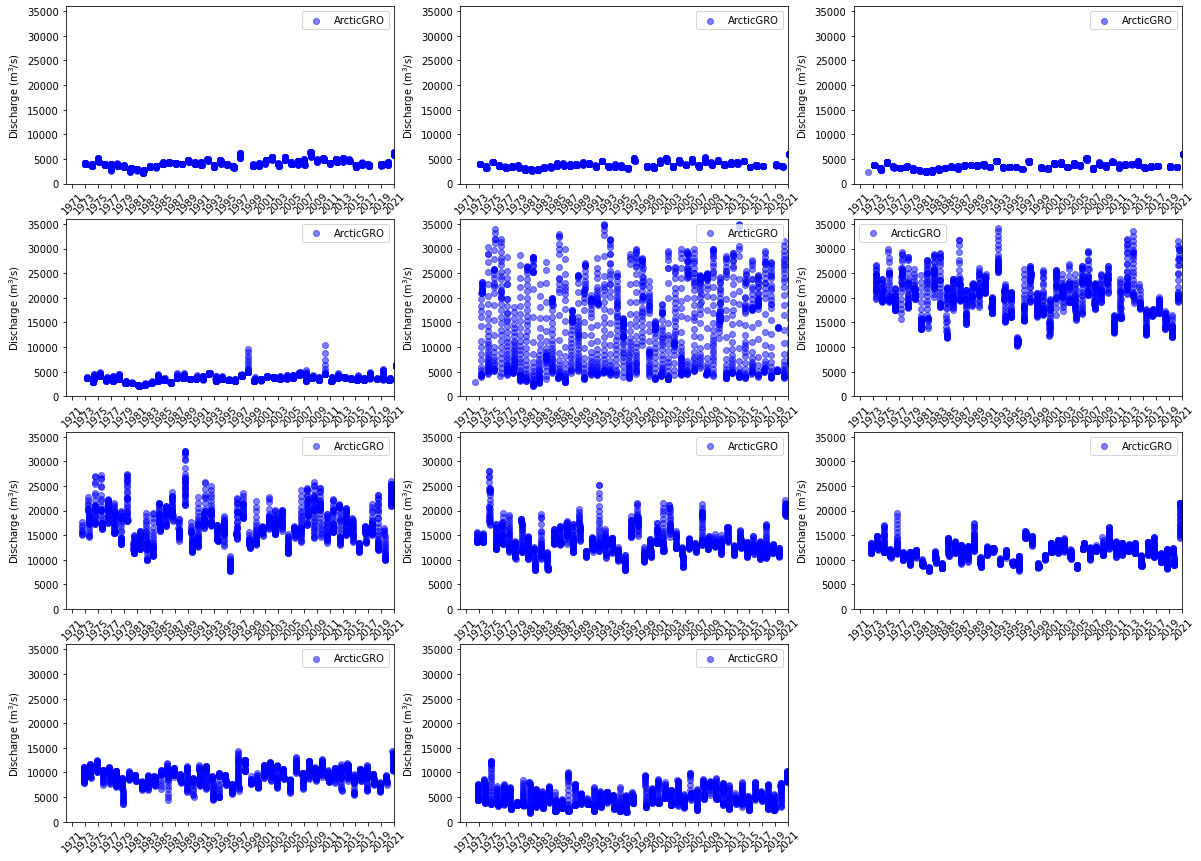

In [93]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

left = datetime.date(1970, 1, 1)
right = datetime.date(2021, 1, 1)


for i in range(1,12):
    axs = fig.add_subplot(4,3,i)
    axs.set_ylim([0, 36000])
    axs.set_xlim([left, right])
    plt.scatter(discharge_grouped.get_group(i).index, discharge_grouped.get_group(i), color = 'Blue', label = 'ArcticGRO', alpha = 0.5)
    axs.legend()
   
    # Major ticks every other year.
    fmt_year = mdates.MonthLocator(interval=24)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Discharge (m$^3$/s)")

axs.legend()
plt.show()


Discharge Trend = 0.7811806913271105
NRMSE: 0.16002385335817548
Discharge Trend = 0.673020705574955
NRMSE: 0.1720619116584452
Discharge Trend = 0.6194617232613833
NRMSE: 0.1554136681753127
Discharge Trend = 0.6937183933684311
NRMSE: 0.08721623614153054
Discharge Trend = 2.0103831278194293
NRMSE: 0.25809453030678586
Discharge Trend = -1.9330356745284967
NRMSE: 0.1697623866584549
Discharge Trend = -0.8782150855822363
NRMSE: 0.15363611183977022
Discharge Trend = -0.5995987809559002
NRMSE: 0.14411570089076173
Discharge Trend = 0.7149270516671128
NRMSE: 0.1519951038676344
Discharge Trend = 0.3173591001054175
NRMSE: 0.15474799191614685
Discharge Trend = 0.4638036472657792
NRMSE: 0.17342052779456768
Discharge Trend = 0.5247534728333401
NRMSE: 0.14970193279630353


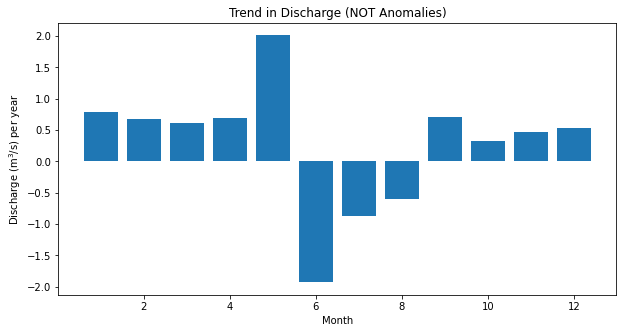

In [29]:
dis_trend = []
dis_nrmse = []

for i in range(1,13):
    #To perform the linear regression we need the dates to be numeric
    #date_ord = temp_grouped.get_group(i).index.values(datetime.date.toordinal)

    # perform regression
    coefficients, residuals, _, _, _ = np.polyfit(range(len(discharge_grouped.get_group(i).index.values)),discharge_grouped.get_group(i),1,full=True)
    mse = residuals[0]/(len(discharge_grouped.get_group(i).index))
    nrmse = np.sqrt(mse)/(discharge_grouped.get_group(i).max() - discharge_grouped.get_group(i).min())
    dis_trend.append(coefficients[0])
    dis_nrmse.append(nrmse)
    print('Discharge Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(range(1,13), dis_trend)


plt.xlabel("Month")
plt.ylabel("Discharge (m$^3$/s) per year")
plt.title("Trend in Discharge (NOT Anomalies)")

plt.show()

### Mean discharge for each month:
monthly_mean_discharge is the mean for each month in the series (lots of months). <br />
monthly_mean_d is the mean of all the monthly means for each month.

In [30]:
monthly_mean_discharge = df_d.discharge.resample('M').mean().dropna()
monthly_mean_d = df_d.discharge.groupby(df_d.discharge.index.month).agg('mean')

monthly_min_discharge = df_d.discharge.resample('M').min().dropna()
monthly_min_d = df_d.discharge.groupby(df_d.discharge.index.month).agg('min')

monthly_max_discharge = df_d.discharge.resample('M').max().dropna()
monthly_max_d = df_d.discharge.groupby(df_d.discharge.index.month).agg('max')

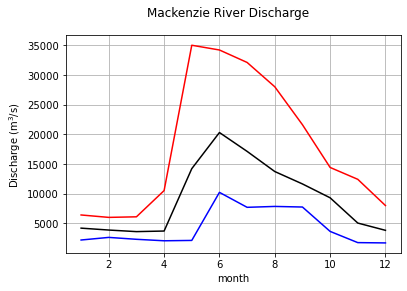

In [31]:
fig, ax = plt.subplots()
fig.suptitle('Mackenzie River Discharge')

ax.plot(monthly_mean_d, label = 'Mean', color = 'black')
ax.plot(monthly_min_d, label = 'Min', color = 'blue')
ax.plot(monthly_max_d, label = 'Max', color = 'red')

ax.set(ylabel = "Discharge (m$^3$/s)", xlabel = 'month')
plt.grid()

## Discharge Anomalies

In [32]:
anomaly_dis = [] # The anomaly for every month in the entire series

for i in range(1,13):
    diff = monthly_mean_discharge.groupby(monthly_mean_discharge.index.month).get_group(i) - monthly_mean_d[i]
    anomaly_dis.append(diff)

Discharge Trend = 24.336613350840015
NRMSE: 0.1814210716961406
Discharge Trend = 19.199352878651858
NRMSE: 0.1807163102761726
Discharge Trend = 21.523277317103936
NRMSE: 0.1571565085265116
Discharge Trend = 19.680782312925167
NRMSE: 0.161572896682775
Discharge Trend = 67.30517588673185
NRMSE: 0.18185610066022695
Discharge Trend = -57.013294253871784
NRMSE: 0.19618376052383266
Discharge Trend = -22.711254114549025
NRMSE: 0.18320592886770068
Discharge Trend = -17.496567013902325
NRMSE: 0.1947961692772485
Discharge Trend = 22.207561224489783
NRMSE: 0.18117190479722656
Discharge Trend = 11.12907175773535
NRMSE: 0.22253880098348847
Discharge Trend = 15.643455999421045
NRMSE: 0.20656997594204762
Discharge Trend = 15.019529642428592
NRMSE: 0.15180683918162002


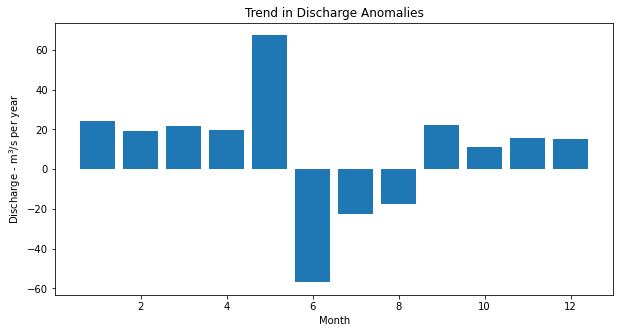

In [34]:
dis_trend_a = [] # The anomaly trend binned for each month (1 - 12) for the entire series
dis_nrmse_a = [] # The anomaly normed RMS error binned for each month (1 - 12_ for the entire series

for i in range(0,12):
    
    coefficients, residuals, _, _, _ = np.polyfit(range(len(anomaly_dis[i].index)),anomaly_dis[i],1,full=True)
    mse = residuals[0]/(len(anomaly_dis[i].index))
    nrmse = np.sqrt(mse)/(anomaly_dis[i].max() - anomaly_dis[i].min())
    dis_trend_a.append(coefficients[0])
    dis_nrmse_a.append(nrmse)
    print('Discharge Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
plt.bar(range(1,13), dis_trend_a)


plt.xlabel("Month")
plt.ylabel("Discharge - m$^3$/s per year")
plt.title("Trend in Discharge Anomalies")

plt.show()

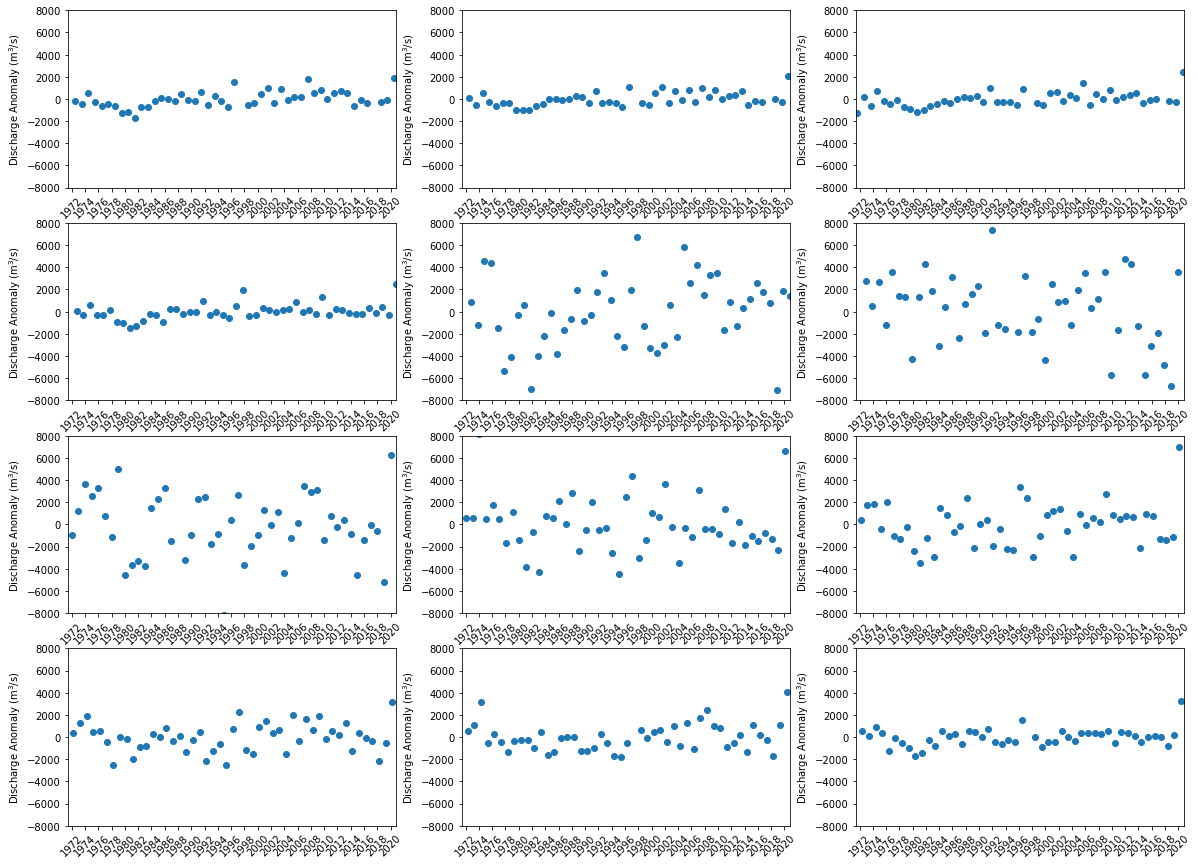

In [35]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

left = datetime.date(1972, 1, 1)
right = datetime.date(2021, 6, 1)


for i in range(0,12):
    axs = fig.add_subplot(4,3,i+1)
    axs.set_ylim([-8000, 8000])
    axs.set_xlim([left, right])
    plt.scatter(anomaly_dis[i].index, anomaly_dis[i])
   
    # Major ticks every other year.
    fmt_year = mdates.MonthLocator(interval=24)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Discharge Anomaly (m$^3$/s)")

plt.show()

In [36]:
dis_trend_a # The anomaly trend binned for each month (1 - 12) for the entire series

[24.336613350840015,
 19.199352878651858,
 21.523277317103936,
 19.680782312925167,
 67.30517588673185,
 -57.013294253871784,
 -22.711254114549025,
 -17.496567013902325,
 22.207561224489783,
 11.12907175773535,
 15.643455999421045,
 15.019529642428592]

In [37]:
dis_trend # The trend binned for each month (1 - 12) for the entire series

[0.7811806913271105,
 0.673020705574955,
 0.6194617232613833,
 0.6937183933684311,
 2.0103831278194293,
 -1.9330356745284967,
 -0.8782150855822363,
 -0.5995987809559002,
 0.7149270516671128,
 0.3173591001054175,
 0.4638036472657792,
 0.5247534728333401]

Why are they different?

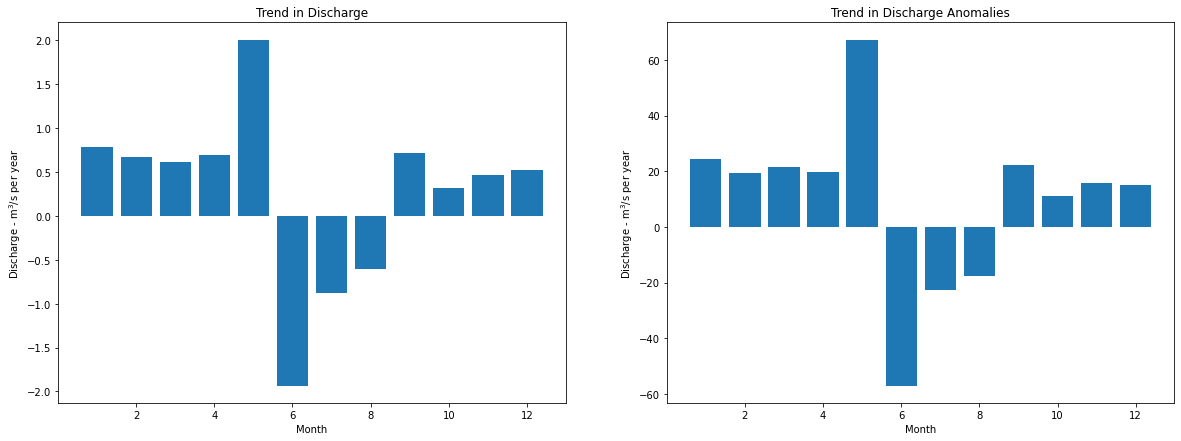

In [38]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(7)
fig.set_figwidth(20)

axs = fig.add_subplot(1,2,1)
plt.bar(range(1,13), dis_trend)
plt.xlabel("Month")
plt.ylabel("Discharge - m$^3$/s per year")
plt.title("Trend in Discharge")

axs = fig.add_subplot(1,2,2)
plt.bar(range(1,13), dis_trend_a)
plt.xlabel("Month")
plt.ylabel("Discharge - m$^3$/s per year")
plt.title("Trend in Discharge Anomalies")

plt.show()

# Heat Flux

%%latex

The monthly means of Temperature (C) and Q (m$^3$/s) are used to calculate heat flux (HF) based on the following formula: <br />

\begin{equation}
HF = 86400 Cp∙\rho∙Q∙WT∙N/10$^12$
\end{equation}

Where HF is the total heat flux per month (106 MJ) relative to water freezing point; Q is the monthly mean discharge (m$^3$/s); WT is the monthly mean water temperature (◦C); N refers to number of days in a given month; Cp is the specific heat of river water (4.184 J/(◦C g)); $\rho$ is
water density (10$^6$ g/m$^3$); and the constant 86400 refers to number of seconds in a day.

Water density varies with temperature and its variation is very small for water temperature range from 0 to 20 ◦C. The density used above (i.e. 106g/m3) is the maximum at 4 ◦C. Heat transport by ice, sediment and other debris in the river water is difficult to quantify and
not considered in this analysis.

In [39]:
Cp = 4.184
rho = 10**6
s = 86400


In [40]:
# To get N (Number of days in month):
def is_leap_year(year):
    return (year % 4 == 0) and (year % 100 != 0) or (year % 400 == 0)

def days_in_month(month, year):

    if month in [9, 4, 6, 11]:
        return 30

    elif month in [1, 3, 5, 7, 8, 10, 12]:
        return 31        

    elif month == 2 and is_leap_year(year) == True:
        return 29

    elif month == 2 and is_leap_year(year) == False:
        return 28

    else:
        return None

Calculate heat flux from 2000 to present

monthly_mean_discharge is the mean for each month in the series (lots of months). <br />
monthly_mean_temperature is the mean for each month in the series (237 months). <br />

In [41]:
monthly_mean_discharge

date
1972-03-31     2290.000000
1972-05-31     2970.000000
1972-07-31    16137.500000
1972-08-31    14288.235294
1972-09-30    11993.333333
                  ...     
2021-01-31     6046.419355
2021-02-28     5943.428571
2021-03-31     6032.100000
2021-04-30     6184.466667
2021-05-31    15607.538462
Name: discharge, Length: 581, dtype: float64

In [42]:
monthly_mean_temperature

2000-01-31     0.0
2000-04-30     0.0
2000-08-31    11.5
2000-10-31     0.5
2001-01-31     0.0
              ... 
2020-07-31    16.0
2020-08-31    15.0
2020-10-31     7.0
2021-01-31     0.0
2021-03-31     0.0
Name: Temp, Length: 119, dtype: float64

We need to scale mean discharge and mean temoerature so the length of each series matches. Then, for each time step, grab the month and year and put it in to the days_in_month function above to get N. Then we can proceed with the heat flux formula.

In [51]:
monthly_mean_temperature = pd.DataFrame(monthly_mean_temperature)

In [52]:
monthly_mean_discharge = pd.DataFrame(monthly_mean_discharge)

In [60]:
result = pd.concat([monthly_mean_temperature.Temp, monthly_mean_discharge.discharge], axis = 1, join = 'inner')

In [85]:
HF = []
for i in range(0, len(result.index)):
    N = days_in_month(result.index.month[i], result.index.year[i])
    heat = 86400 * Cp * rho * result.Temp[i] * result.discharge[i] * N/(10**12)
    HF.append(heat)
    

In [87]:
result['HF'] = HF

In [88]:
result

,Temp,discharge,HF
2000-01-31,0.0,3827.419355,0.000000e+00
2000-04-30,0.0,3352.333333,0.000000e+00
2000-08-31,11.5,14738.709677,1.899435e+06
2000-10-31,0.5,10210.645161,5.721242e+04
2001-01-31,0.0,4650.000000,0.000000e+00
...,...,...,...
2020-07-31,16.0,23350.741935,4.186854e+06
2020-08-31,15.0,20362.645161,3.422887e+06
2020-10-31,7.0,12412.419355,9.736920e+05
2021-01-31,0.0,6046.419355,0.000000e+00


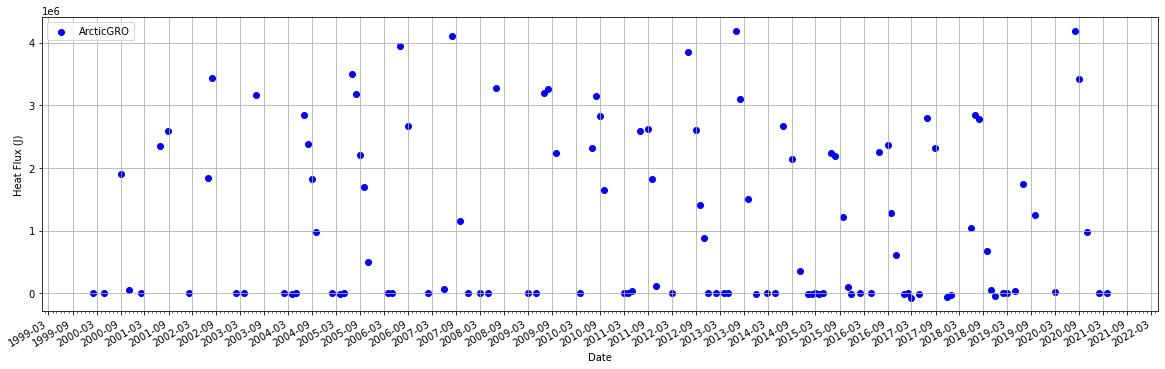

In [92]:
fig, ax = plt.subplots(figsize=(20,6))

ax.scatter(result.index.values, result.HF, color = 'Blue', label = 'ArcticGRO')


ax.set(xlabel="Date",
       ylabel="Heat Flux (J)")

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

ax.legend()
plt.grid()
plt.show()

In [94]:
result_grouped = result.groupby(result.index.month)
result_grouped.agg("count")

,Temp,discharge,HF
1,13,13,13
2,9,9,9
3,9,9,9
4,13,13,13
5,2,2,2
6,18,18,18
7,10,10,10
8,12,12,12
9,12,12,12
10,9,9,9


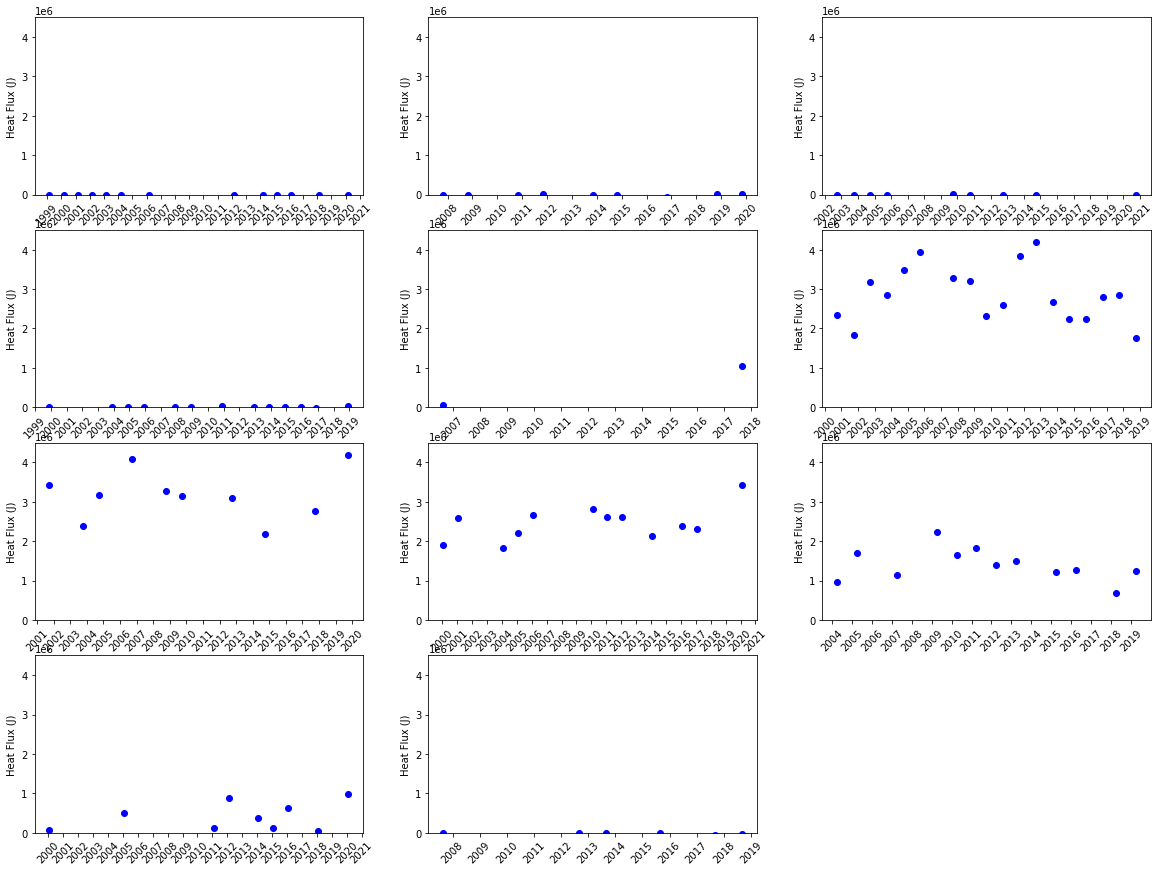

In [106]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)


for i in range(1,12):
    axs = fig.add_subplot(4,3,i)
    axs.set_ylim([0, 4.5*10**6])
    plt.scatter(result_grouped.get_group(i).index, result_grouped.HF.get_group(i), color = 'Blue')
    
   
    # Major ticks every year.
    fmt_year = mdates.MonthLocator(interval=12)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Heat Flux (J)")


plt.show()



Heat flux monthly trends:

Heat Flux Trend = -81.03008429010991
NRMSE: 0.2851663199510028
Heat Flux Trend = -623.3586289919995
NRMSE: 0.2721094598470202
Heat Flux Trend = 314.1835891200005
NRMSE: 0.2780378144350153
Heat Flux Trend = 814.7923512685711
NRMSE: 0.28138327258076695
Heat Flux Trend = -20520.02047477313
NRMSE: 0.276692433236245
Heat Flux Trend = 9182.678781207243
NRMSE: 0.3051469164584892
Heat Flux Trend = 60897.64975351059
NRMSE: 0.22522744125061483
Heat Flux Trend = -39809.55373934097
NRMSE: 0.2371572169240208
Heat Flux Trend = 42845.56495372798
NRMSE: 0.34552470656373624
Heat Flux Trend = -9638.455581257142
NRMSE: 0.21905363394913407


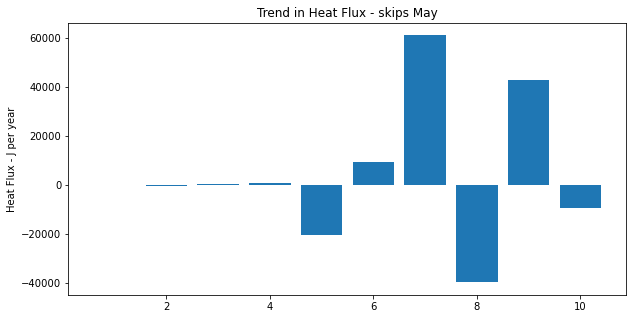

In [139]:
HF_trend = [] # The  trend binned for each month (1 - 12) for the entire series
HF_nrmse = [] # The  normed RMS error binned for each month (1 - 12_ for the entire series

for i in [x for x in range(1,12) if x != 5]:
    
    coefficients, residuals, _, _, _ = np.polyfit(range(len(result_grouped.get_group(i).index)),result_grouped.HF.get_group(i),1,full=True)
    mse = residuals[0]/(len(result_grouped.get_group(i).index))
    nrmse = np.sqrt(mse)/(result_grouped.HF.get_group(i).max() - result_grouped.HF.get_group(i).min())
    HF_trend.append(coefficients[0])
    #HF_nrmse.append(nrmse)
    print('Heat Flux Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
plt.bar(range(1,11), HF_trend)


#plt.xlabel("Month")
plt.ylabel("Heat Flux - J per year")
plt.title("Trend in Heat Flux - skips May")

plt.show()

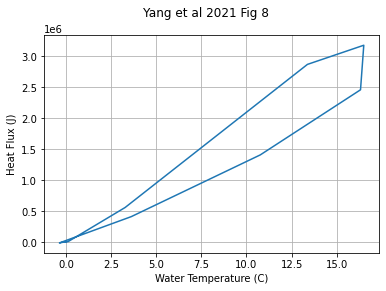

In [148]:
fig, ax = plt.subplots()
fig.suptitle('Yang et al 2021 Fig 8')

ax.plot(result_grouped.Temp.agg("mean"), result_grouped.HF.agg("mean"))
ax.set(xlabel = "Water Temperature (C)")
ax.set(ylabel = "Heat Flux (J)")

plt.grid()

I have to figure out how to put the month markers on the line

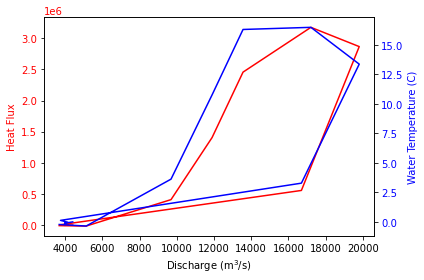

In [153]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('Discharge (m$^3$/s)')
ax1.set_ylabel('Heat Flux', color=color)
ax1.plot(result_grouped.discharge.agg("mean"), result_grouped.HF.agg("mean"), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Water Temperature (C)', color=color)  # we already handled the x-label with ax1
ax2.plot(result_grouped.discharge.agg("mean"), result_grouped.Temp.agg("mean"), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

This matched Yang et al 2021 fig 8 nicely! 